In [7]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pickle
from astropy.coordinates import SkyCoord
from dustmaps.config import config
config['data_dir'] = '/home/weissj3/Desktop/MWTools/Data'

import dustmaps.sfd
dustmaps.sfd.fetch()
import astropy.units as u

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.


In [9]:
filenames = ["N12toN10", "N15toN12", "N17toN15", "N20toN17", "P10toP11", "P11toP12", "P12toP13", "P13top14", "P14top15", "P15toP16", "P16toP17", "P17toP20"]
starLen = 0
for name in filenames:
    data = {"ID":[], "g":[], "r":[], "g_err":[], "r_err":[], "l":[], "b":[]}
    f = open("../../SummerREUDiskWork/public_html/PanStarrsMSTO/PS_MSTO/" + name + ".csv", "r")
    f.readline()


    for line in f:
        ln = list(map(float, line.split(",")))
        data["ID"].append(ln[0])
        data["g"].append(ln[1])
        data["r"].append(ln[2])
        data["g_err"].append(ln[3])
        data["r_err"].append(ln[4])
        data["l"].append(ln[5])
        data["b"].append(ln[6])
    print("Stars In File %s: %d" % (name, len(data['ID'])))
    coords = SkyCoord(data['l'],data['b'],  unit='deg', frame='galactic')

    sfd = dustmaps.sfd.SFDQuery()
    extinctionValues = sfd(coords) #3.303 is conversion from E(B-v) to sdss g
    data['g_0'] = np.array(data['g']) - (extinctionValues * 3.172)
    data['r_0'] = np.array(data['r']) - (extinctionValues * 2.271)
    data['(g-r)_0'] = np.array(data['g_0']) - np.array(data['r_0'])
    
    f.close()


    mask = np.where((np.array(data["(g-r)_0"]) > 0.1) & (np.array(data["(g-r)_0"]) < 0.3)) 

    data["ID"] = np.array(data["ID"])[mask]
    data["g"] = np.array(data["g"])[mask]
    data["r"] = np.array(data["r"])[mask]
    data["g_err"] = np.array(data["g_err"])[mask]
    data["r_err"] = np.array(data["r_err"])[mask]
    data["l"] = np.array(data["l"])[mask]
    data["b"] = np.array(data["b"])[mask]
    data['g_0'] = np.array(data['g_0'])[mask]
    data['r_0'] = np.array(data['r_0'])[mask]
    data['(g-r)_0'] = np.array(data['(g-r)_0'])[mask]
    
    a = open("../../SummerREUDiskWork/public_html/PanStarrsMSTO/ColorCut/" + name + ".pk", "wb")
    pickle.dump(data, a)
    a.close()
    del data

Stars In File N12toN10: 10259083
Stars In File N15toN12: 2126541
Stars In File N17toN15: -5937026
Stars In File N20toN17: 1919483
Stars In File P10toP11: -3338635
Stars In File P11toP12: -375503
Stars In File P12toP13: -415586
Stars In File P13top14: -237238
Stars In File P14top15: -276338
Stars In File P15toP16: -215792
Stars In File P16toP17: -213184


KeyboardInterrupt: 

In [ ]:
#Read in Pannstars Data from file (JEFF'S DATA (NEW))
#Don't use this if you can avoid it. Eats all memory
data = {"ID":[], "g":[], "r":[], "g_err":[], "r_err":[], "l":[], "b":[]}
filenames = ["N12toN10.csv", "N15toN12.csv", "N17toN15.csv", "N20toN17.csv", "P10toP11.csv", "P11toP12.csv", "P12toP13.csv", "P13top14.csv", "P14top15.csv", "P15toP16.csv", "P16toP17.csv", "P17toP20.csv"]
starLen = 0
for name in filenames:
    f = open("../../SummerREUDiskWork/public_html/PanStarrsMSTO/PS_MSTO/" + name, "r")
    f.readline()


    for line in f:
        ln = list(map(float, line.split(",")))
        data["ID"].append(ln[0])
        data["g"].append(ln[1])
        data["r"].append(ln[2])
        data["g_err"].append(ln[3])
        data["r_err"].append(ln[4])
        data["l"].append(ln[5])
        data["b"].append(ln[6])
    print("Stars In File %s: %d" % (name, len(data['ID']) - starLen))
    starLen = len(data['ID'])

    f.close()

print("Read in %d stars" % len(data["ID"]))

Stars In File N12toN10.csv: 10259083
Stars In File N15toN12.csv: 12385624
Stars In File N17toN15.csv: 6448598
Stars In File N20toN17.csv: 8368081
Stars In File P10toP11.csv: 5029446
Stars In File P11toP12.csv: 4653943
Stars In File P12toP13.csv: 4238357
Stars In File P13top14.csv: 4001119
Stars In File P14top15.csv: 3724781
Stars In File P15toP16.csv: 3508989


In [ ]:
#Read in Pannstars Data from file (SARAH'S DATA (OLD))
data = {"ID":[], "g":[], "r":[], "g_err":[], "r_err":[], "l":[], "b":[]}
filenames = ["25L100-20B-10.csv", "25L10010B20.csv", "100L210-20B-10.csv", "100L21010B20.csv", "210L330-20B-10.csv", "210L33010B20.csv", "330L25allB.csv"]
starLen = 0
for name in filenames:
    f = open("../../SummerREUDiskWork/public_html/SarahGonzalez2018/PANSTARRS DR1 Data/Data with Extinctions and Applied Color Cut/" + name, "r")
    f.readline()


    for line in f:
        ln = list(map(float, line.split(",")))
        data["ID"].append(ln[1])
        data["g"].append(ln[2])
        data["r"].append(ln[3])
        data["g_err"].append(ln[4])
        data["r_err"].append(ln[5])
        data["l"].append(ln[6])
        data["b"].append(ln[7])
    print("Stars In File %s: %d" % (name, len(data['ID']) - starLen))
    starLen = len(data['ID'])

    f.close()

print("Read in %d stars" % len(data["ID"]))

In [3]:
import gc

gc.collect()

0

In [5]:
for i in np.arange(len(data["l"])):
    data["l"][i] = float(data["l"][i] > 180) * -(360 - data["l"][i]) +  float(data["l"][i] < 180) * (data["l"][i])

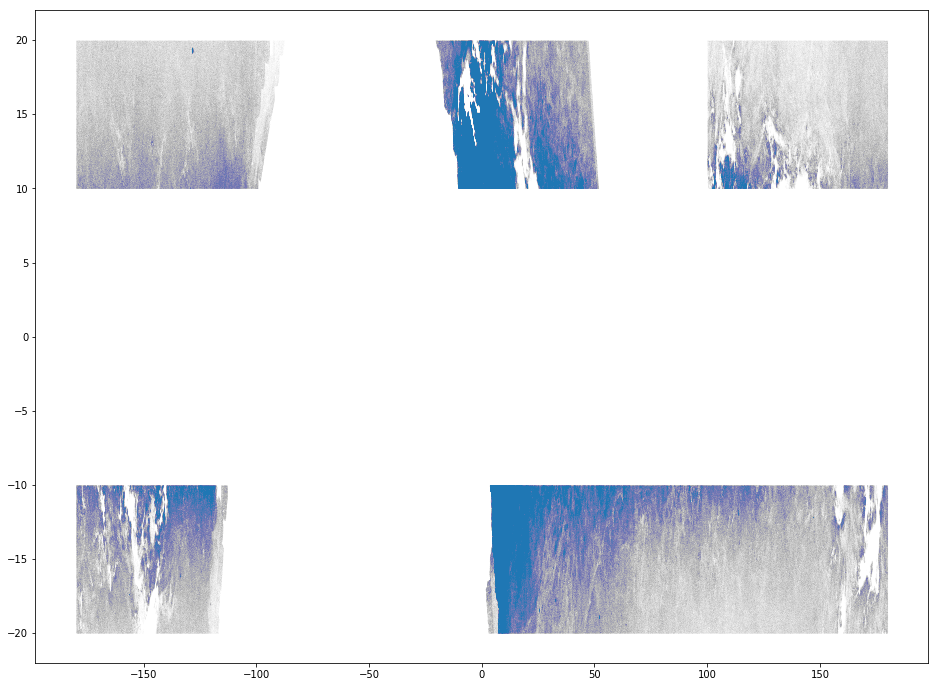

In [6]:
#Plot Pannstars data to make sure it was read in correctly
#Looks like there is a lot of dust
plt.figure(1, figsize=(16, 12))
mask = np.where((np.array(data["g"]) > 16.0) & (np.array(data["g"]) < 22.5)) 

plt.plot(np.array(data["l"])[mask],np.array(data["b"])[mask], 'o', ms=0.1, alpha=0.02)
plt.show()

In [6]:
#Slice the disk into l bins

for i in np.arange(0, 360, 2.5):
    temp = []
    mask = np.where((np.array(data["l"]) > i) & (np.array(data["l"]) < i+2.5)) 
    temp.append(np.array(data["l"])[mask])
    temp.append(np.array(data["b"])[mask])
    temp.append(np.array(data["g"])[mask])
    a = open("../Data/SlicedDisk/l_cuts/l-%d.pickle" % int((i+1.25)*100), "wb")
    pickle.dump(temp, a)
    a.close()
    

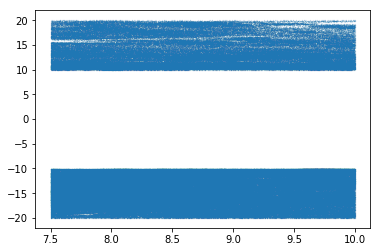

In [50]:
#Plot to check cuts
plt.plot(np.array(l_cut)[3, 0],np.array(l_cut)[3, 1], 'o', ms=0.1, alpha=0.5)
plt.show()

In [20]:
#Cut into b bins
for i in np.arange(0, 360, 2.5):
    a = open("../Data/SlicedDisk/l_cuts/l-%d.pickle" % int((i+1.25)*100), "rb")
    loadedData = pickle.load(a)
    a.close()
    for j in np.arange(-20, 20, 2.5):
        temp = []
        mask = np.where((np.array(loadedData[1]) > j) & (np.array(loadedData[1]) < j+2.5)) 
        temp.append(np.array(loadedData[0])[mask])
        temp.append(np.array(loadedData[1])[mask])
        temp.append(np.array(loadedData[2])[mask])
        b = open("../Data/SlicedDisk/lb_cuts/l-%d-b-%d.pickle" % (int((i+1.25)*100), int((j+1.25)*100)), "wb")
        pickle.dump(temp, b)
        b.close()
    a.close()
    


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


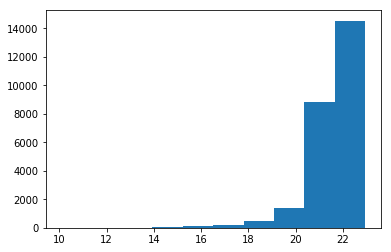

In [25]:
#Plot distance histogram
b = open("../Data/SlicedDisk/lb_cuts/l-1125-b-1625.pickle", "rb")
temp = pickle.load(b)
b.close()


plt.hist(temp[2])
plt.show()

In [35]:
#Convert pickle files to histogram files for optimizer
for i in np.arange(0, 360, 2.5):
    for j in np.arange(-20, 20, 2.5):
        a = open("../Data/SlicedDisk/lb_cuts/l-%d-b-%d.pickle" % (int((i+1.25)*100), int((j+1.25)*100)), "rb")
        loadedData = pickle.load(a)
        a.close()
        hist = np.histogram(loadedData[2], bins=13, range=(16.0, 22.5))
        b = open("../Data/SlicedDisk/lb_histograms/l-%d-b-%d.hist" % (int((i+1.25)*100), int((j+1.25)*100)), "w")
        b.write('0')
        for k in hist[0]:
            b.write(', ' + str(k))
        b.close()
    a.close()

In [ ]:
#Plot Results
for i in np.arange(0, 360, 2.5):
    for j in np.arange(-20, 20, 2.5):
        a = open("../Data/SlicedDisk/lb_cuts/l-%d-b-%d.pickle" % (int((i+1.25)*100), int((j+1.25)*100)), "rb")
        loadedData = pickle.load(a)
        a.close()
        hist = np.histogram(loadedData[2], bins=13, range=(16.0, 22.5))
        b = open("../Data/SlicedDisk/lb_histograms/l-%d-b-%d.hist" % (int((i+1.25)*100), int((j+1.25)*100)), "w")
        b.write('0')
        for k in hist[0]:
            b.write(', ' + str(k))
        b.close()
    a.close()